# FINAL PROJECT - O. Czechowicz, N. Korczak, A. Marzec

Tasks:
- O. Czechowicz - gathering and extracting data, creating the code, describing results, discussion
- N. Korczak - research for study and writing introduction
- A. Marzec - describing data source, data analysis, describing results of topic modeling, discussion

### **The Impact of Pre-Election Periods on News Sentiment: A Comparative Analysis of Election and Non-Election Years Using Sentiment Analysis**

# **Introduction**

## **Problem Significance**

Media can not only provide objective information regarding the state of the world, but also influence its recipient's worldview and opinions. The selection of words, the context in which information is presented and emotional tone of the presentation, all can impact the degree to which information covered in news media can be perceived positively or negatively. This phenomenon has been mostly observed in regards to how news media can impact perception of politics. Among others, media has been found to strengthen polarization, affect voting preferences, and even determine election outcomes (McCombs, 2002; Utych, 2018; Patterson, 2016).

For instance, affective language in political news articles influences how individuals process information, shaping their political evaluations and decisions (Utych, 2018). Utych (2018) suggests that negative affective language can alter individuals' moods, leading to more negative and critical judgments of the presented subject. Moreover, the impact of such language can vary based on cognitive complexity. When information processing (of information provided in the article) requires deeper engagement, the effect of an article’s negative sentiment on opinion formation is stronger, as these evaluations become more deeply encoded in memory compared to those formed through heuristic processing. This supports the idea that sentiment in news coverage matters and can have varying effects depending on the context.

Media then plays a crucial role in shaping public opinion, especially during pre-election periods. They influence public perception by selecting and prioritizing certain topics, a process known as agenda-setting. By frequently highlighting specific issues, the media can lead society to view them as more significant. The choice of topics covered by the media can impact election outcomes, political decisions, the social mood, and levels of political polarization (McCombs, 2002). However, there has not yet been a systematic analysis comparing the tone of news coverage during election years to that of non-election years.

During the 2016 US presidential election, Thomas E. Patterson (2016) examined how the media covered the candidates. He highlighted that media largely focused on negative coverage of both Donald Trump and Hillary Clinton. Rather than analyzing the candidates' policies and platforms, the media concentrated on scandals, controversies, and campaign tactics. This emphasizes the essential requirement for recipients to enhance their skills in critically analyzing media messages and distinguishing between factual information and biased or misleading content. In an era of information overload, where sensationalism and misinformation are widespread, media consumers must learn to evaluate sources, recognize potential biases, and question the narratives presented to them.

Moreover, research indicates that the sentiment of political information can be strategically manipulated to craft narratives. A sentiment analysis of Russian Facebook ads during the 2016 U.S. presidential election showed that, while the sentiment remained mostly positive, it became more negative as the election approached, before shifting back to positive afterward (Alvarez et al., 2020). The researchers suggest that this shift in sentiment could be a deliberate strategy aimed at influencing individuals' heuristic and emotional reactions from the perceived ads. The initial positive sentiment was hypothesized to strengthen in-group identity and favoritism, while the increase in negative sentiment closer to the election may have been intended to provoke emotional responses and reinforce boundaries between the in-group and out-group.

Investigating the role of news coverage sentiment in shaping public opinion on political issues is valuable, as it can enhance our understanding and even aid in predicting political outcomes. Chaudhry et al. (2021) analyzed sentiment in public opinion on Twitter in relation to the 2020 U.S. presidential election results. Their findings indicate that, in most states, the sentiment expressed toward a given candidate aligned with the election outcome.

This project aims then, to investigate how news articles' sentiment values differ between non-election and election years. More specifically, it seeks to explore whether the media adopts a more negative tone in pre-election periods compared to non-election years. To achieve this, sentiment value scores comparison will be performed on press articles sourced from various outlets. Moreover, since this possible phenomenon has been largely studied in the context of United States, and more specifically of american presidential elections, we chose to focus on that context as well (looking into the last two election cycles - 2017 to 2020, and 2021 to 2024), to see whether this previously described pattern can be replicated in our study.

Additionally, to enhance the understanding behind the sentiments of news coverage, a qualitative investigation on the level of similarity between themes emerging from the articles’ titles from both election and non-election years will be conducted.


## **Research Questions**

Does the sentiment of the news articles differ between election and non-election years?

Do the media publish more negative content during election periods compared to non-election years?

Do themes emerging in the news coverage differ in election years compared to non-election years?

# **Data Source**

Firstly, it must be noted that all discussed data is provided in the following Google Drive folder: https://drive.google.com/drive/u/1/folders/1UJ7Pov6_98LtyTup-Hrnf0buA7q-NRuP and in a zip file provided alongside the project in Google Classroom.

Secondly, the discussed documentation codebook for the used dataset can be found in the Google Drive folder or in the provided link: http://data.gdeltproject.org/documentation/GDELT-Global_Knowledge_Graph_Codebook-V2.pdf.


This project relied on data gathered from the Global Database of Events, Language, and Tone Project (GDELT Project), and more specifically the Global Knowledge Graph Version 2.0 (GKG 2.0) dataset found in GDELT. The GKG 2.0 dataset represents a network structure of global news through providing a wide range of information about news articles on a worldwide scale – among others, articles' sentiment value, which was crucial for our analysis.

As such we decided to gather our data through accessing the partitioned version of GKG 2.0 (a version of GKG 2.0 which allows for better optimization when looking for articles in specific time periods) dataset through the use of the Google BigQuery database platform.

This process relied on firstly creating a specific query to gather data which matched our sample needs, i.e. a random draw of 1000 american news articles per year for the period ranging from 2017 to 2024 (encompassing two american election cycles), creating together a sample of *N* = 8000 articles.

Unfortunately, it was not possible to filter for articles based on their country of origin. We decided then to look for articles which were published in three of the biggest online news media sources in the United States, i.e. "usatoday.com", "nbcnews.com" and "foxnews.com".

Regarding the information about the articles, we decided on these specific fields from the GKG 2.0 dataset: sentiment values (V2Tone field), date of publishing (DATE field), source (SourceCommonName field) and web address (DocumentIdentifier field), as they were neccesary for drawing the specific sample and provided neccessary information for the analysis.

The V2Tone field which provided sentiment values, was formatted as a string representing 7 types of sentiment values seperated by a comma. The first three of these values represented compound, positive and negative sentiment respectively, and these are the values we focused our analysis on. The three sentiment types can be characterized as following:
  - 1) Tone - a compound sentiment, calculated by subtracting negative sentiment from positive sentiment. Ranges from -100 (extremely negative) to +100 (extremely positive), commonly is placed between -10 and +10, with 0 indicating neutral.  
  - 2) Positive sentiment - percentage of all words in article which were found to have a postive emotional connotation. Ranges from 0 to +100.
  - 3) Negative sentiment - percentage of all words in article which were found to have a negative emotional connotation. Ranges from 0 to +100.


Below, is an example of query format (using SQL language) that was used to extract the articles for each year.

```
SELECT
'DATE',
'SourceCommonName',
'V2Tone',
'DocumentIdentifier'
FROM 'gdelt-bd.gdelty2.gkg_partitioned'
 WHERE _PARTITIONTIME >= TIMESTAMP('2019-01-01 00:00:00')
 AND _PARTITIONTIME < TIMESTAMP('2019-12-31 00:00:00') AND
 ( SourceCommonName in ('usatoday.com', 'nbcnews.com', 'foxnews.com'))
 ORDER BY RAND()
 LIMIT 1000

```

We had to draw 1000 articles seperately for each year, due to the limitations of Google BigQuery. A larger asked amount of articles resulted in an information that the free provided qouta of available computing power was exceeded.

After each year's sample was generated, it was downloaded locally in the form of a json file. Next, all json files were grouped together into a folder "articles", which is provided in the linked Google Drive folder and in the zip file as well.

Furthermore, since we wanted to explore the themes of news articles in election years compared to non-election years, we decided to conduct topic modeling based on gathered titles of the articles. Titles were used instead of content, as (1) they are publicaly available, and web-scraping them did not infringe on any copyright issues and (2) they provide enough substanial information on the general content which was covered in a given article.

# **Data Analysis**

Although, our research questions mainly pertain to seeking any differences in sentiment patterns of american news articles between those stemming from election and non-election years, we also wanted to start analysis with a quick exploration into how sentiment changed across the entire gathered period of years from 2017 to 2024. This was done in order to check whether the last two election cycles differed, though a possible bias introduced by the impact of the COVID-19 pandemic in 2020. This low-level exploration was done through a line plot visualization of how the three types of sentiment, i.e. compound positive and negative, changed across the last two election cycles.

More importantly, to answer the question of whether the sentiment of news coverage differs between the election and non-election years and to check whether it was possibly more negative in the election years, t-test analyses were conducted to compare the mean scores of all sentiment types (compound, positive and negative) for the two distinguished groups, i.e. articles gathered from election (2020, 2024) and non-election years (2017, 2018, 2019, 2021, 2022 and 2023).

Additionally, for visualization purposes to more easily detect any possible differences, especially regarding negative sentiment, we decided to plot the change in sentiment regarding year type (election vs non-election) as well.

This approach allowed us to investigate the emotional valence of all articles from two separate timeframes. We have decided to investigate both positive and negative, as well as overall sentiment for the articles, as it provided more insight into general understanding of the trends in articles’ emotional valence and their difference the election and non-election years.

Furthermore, to answer the question regarding similiarity in themes emerging from the news coverage in election and non-election years, we have decided to use the Latent Dirichlet Allocation (LDA) Model technique. As we aimed to use only legally obtained data we have performed the topic modelling only on the scraped articles’ titles that were publicly accessible. We have built a different corpus for each time period of interest (while using the two groups of articles: from election vs non-election years). As our initial dataset was quite large (8000 articles), to reduce the data, for both titles from the election and non-election years, we have decided to search for a solution proposing from 5 to 10 topics. We have then searched for the model(s) that best fits the data according to the coherence measure. These analyses allowed us to qualitatively investigate themes that news covered during election years as well as the non-election years. We have attempted to name the themes extracted for each period, based on the distribution of words that the topics represent.


# **Used Code and Analysis' Results**

In this section, the code used for importing the raw data from the "articles" folder is shown, followed by the way it was restructured and used for analysis for addressing our research questions.

Furthermore, analyses discussed in the previous section are conducted and their results are described.

In [ ]:
# Loading all libraries used in the project.
import os
import json
import requests as rq
from bs4 import BeautifulSoup
from string import punctuation
from collections import defaultdict
import nltk
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

import spacy
from gensim.corpora import Dictionary
from gensim.models import LdaModel
import pandas as pd
import sys

nlp = spacy.load("en_core_web_sm")

## **Extraction of Raw Data and Restructuring Process**

In [ ]:
# Reading the jsonl files into the collab environment.

folder_path = "/content/articles folder/"

american_articles = []

for filename in os.listdir(folder_path):
    file_path = os.path.join(folder_path, filename)

# Below is an if-else statement that accounts for "invisible" files created by colab,
# that we did not want to iterate over.
# Only files with ".json" in title, indicating that they are json type were to be uploaded into the enviroment.

    if not filename.endswith(".json") or filename.startswith("."):
        continue

# Next, year is extracted from the json file name - to later serve as the value for a "year" key,
# although a timestamp date of the article is available, since we wanted to do yearly comparisons,
# this new key made it much more convient for that purpose.
    year = filename.split("_")[0]

# Below, creating one list holding all gathered articles.
# All files from the folder are uploaded,
# and appended into one large list "american_articles".
# Each new dictionary has a key added - for year and sentiment.
    with open(file_path, "r") as file:
        data = json.load(file)
        for article in data:
            article['year'] = year

# Below the three types of sentiment values are extracted,
# through splitting the V2Tone value's string by comma characters,
# and then accessing the neccesary elements.
            article['sentiment'] = {
                    "compound" :  float(article['V2Tone'].split(",")[0]),
                    "positive" : float(article['V2Tone'].split(",")[1]),
                    "negative" : float(article['V2Tone'].split(",")[2])
                    }
            american_articles.append(article)

In [ ]:
# Creating a function to scrape titles from all gathered articles in the jsonl file.
# This titles will be later used in topic modelling.

def title_scraper(article):
    """
    Takes a provided web adress of a news article sourced in the following websites: usatoday.com,
    foxnews.com and nbcnews.com, and then conducts web-scraping to extract the title of the article,
    which is returned in a form without any non-alphabet characters.

    Parameters:
    -----------
        article (dict): a dictionary representing information about an article,
                        including the web adress that it is hosted at.

    Returns:
    --------
        title_clean (str) : a string representing the title of the article, consisting only of
                            alphabet characters.
        (None) : None value is returned, if title is not found.

    """


    link = article['DocumentIdentifier']

    # Try-except was used to combat any possible errors - due to the period used,
    # some older articles were no longer hosted by their websites, yet were still
    # present in the GKG 2.0 dataset.

    try:
        response = rq.get(link)
        response.raise_for_status()  # Checks if the request was successful,
    except rq.exceptions.HTTPError as err:
        print(f"HTTP error occurred: {err}")  # if not, an error message is printed.
        return None
    except rq.exceptions.RequestException as err:
        print(f"Error occurred: {err}")
        return None

    # As 8000 articles were used, we created a parser for the most "generic" tag,
    # most commonly used for headers, i.e. the h1 tag.
    # We checked firstly, whether this tag was used for the sourced online news websites,
    # and it worked most of the time, so it was used for all three websites
    # indiscriminatory.

    html = BeautifulSoup(response.content, 'html.parser')
    title = html.select_one('h1')

    # Next, if a title exists it is extracted,
    # if not, a None is returned - and those articles will not be taken into account
    # later during the topic modeling.

    if title:
        title_text = title.get_text(strip = True)
    else:
        return None

    # Lastly, removing any punctuation from title.
    words = [word for word in title_text.split() if word not in punctuation]
    title_clean = " ".join(words)

    return title_clean


In [ ]:
# Getting titles of articles and attaching them to each article's dictionary.
# This is done in a seperate loop, as scraping for 8000 articles takes around an hour.

for article in american_articles:
    article['title'] = title_scraper(article)
    print(article['title']) # To check up on how the process of scraping is being carried out.

Strumieniowane dane wyjściowe obcięte do 5000 ostatnich wierszy.
Putin’s strategic failure and ‘miscalculations’ play out on the world stage, experts weigh in
Police found no substance in 'suspicious' mail sent to Kari Lake HQ
Want to improve your mental health? Helping others can be a good way to help yourself.
WaPo columnist pleads with GOP to admit Dems were right about Trump, ditch him to avoid ‘party suicide’
HTTP error occurred: 404 Client Error: Not Found for url: https://www.nbcnews.com/news/us-news/halyna-hutchins-family-sues-alec-baldwin-rust-filmmakers-fatal-shootin-rcna16345
None
Zachary Levi had a mental health 'breakdown.' Here's how 'Radical Love' helped him heal
Anne Hathaway floors Kelly Clarkson with 'Since U Been Gone' cover: 'Should I just quit?'
HTTP error occurred: 404 Client Error: OK for url: https://www.usatoday.com/videos/news/nation/2022/01/29/powerful-winter-storm-slams-east-coast/9269245002/
None
Oklahoma State Bureau of Investigation launches investigation

In [ ]:
# The full jsonl file with titles.
# It's saved into a jsonl file, that was used for debugging and code checking,
# in order not to wait the full time of title-web scraping each time.

with open("articles.jsonl", "w", encoding = "utf-8") as file:
    for line in american_articles:
        file.write(json.dumps(line, ensure_ascii = False) + "\n")

In [ ]:
# Then you can upload the articles.jsonl using the code below.

with open("articles.jsonl", "r") as file:
    american_articles = [json.loads(item) for item in file.readlines()]

In [ ]:
# Now, let's look at structure of each article dictionary in the american_articles object.

american_articles[0]

{'DATE': '20211222233000',
 'SourceCommonName': 'foxnews.com',
 'V2Tone': '6.55737704918033,6.55737704918033,0,6.55737704918033,23.3606557377049,1.63934426229508,215',
 'DocumentIdentifier': 'https://www.foxnews.com/lifestyle/cranberry-margarita-holiday-recipe',
 'year': 2021,
 'title': "'Tis the season for cranberry margaritas: Recipe",
 'sentiment': {'compound': 6.55737704918033,
  'positive': 6.55737704918033,
  'negative': 0.0}}

## **Calculating the Mean Sentiment of Articles Per Year**



In [ ]:
# Next, calculating the mean sentiment for each year of news articles.

# Firtly, creating a dictionary for aggregating total sentiment and count of the dictionaries.
year_total_sentiment = defaultdict(lambda: {"total_compound": 0,
  "total_positive" : 0,
  "total_negative" : 0,
  "count" :0})

# And then adding to that dictionary
# a total amount of three sentiment for each year.
# And a count of articles for each year.

for article in american_articles:
    year = article['year']

    sentiment = article['sentiment']
    compound = sentiment['compound']
    positive = sentiment['positive']
    negative = sentiment['negative']

    year_total_sentiment[year]['total_compound'] += compound
    year_total_sentiment[year]['total_positive'] += positive
    year_total_sentiment[year]['total_negative'] += negative
    year_total_sentiment[year]["count"] += 1


In [ ]:
# Next, we can calculate the mean sentiment for each year.

# Firstly, creating an empty list,
# where dictionaries will be appended.
# These dictionaries are composed of a year and mean sentiment key.
# The mean sentiment key, furthermore, has a value of a dictionary,
# where each mean value of each sentiment type is held in a rounded format.

yearly_sentiment = []

for key, value in year_total_sentiment.items():
    mean_compound = value["total_compound"] / value["count"]
    mean_positive = value["total_positive"] / value["count"]
    mean_negative = value["total_negative"] / value["count"]
    year = int(key)
    yearly_sentiment.append({
        "year": year,
        "mean sentiment": {
            "compound" : round(mean_compound, 3),
            "positive" : round(mean_positive, 3),
            "negative" : round(mean_negative, 3)
            }
    })

# Lastly, sorting the yearly_sentiment dictionary by year in increasing order.
yearly_sentiment = sorted(yearly_sentiment, key=lambda x: x['year'])
yearly_sentiment

[{'year': 2017,
  'mean sentiment': {'compound': -2.349,
   'positive': 2.418,
   'negative': 4.767}},
 {'year': 2018,
  'mean sentiment': {'compound': -2.287,
   'positive': 2.259,
   'negative': 4.546}},
 {'year': 2019,
  'mean sentiment': {'compound': -2.087,
   'positive': 2.387,
   'negative': 4.474}},
 {'year': 2020,
  'mean sentiment': {'compound': -1.923,
   'positive': 2.466,
   'negative': 4.389}},
 {'year': 2021,
  'mean sentiment': {'compound': -2.173,
   'positive': 2.476,
   'negative': 4.649}},
 {'year': 2022,
  'mean sentiment': {'compound': -2.468,
   'positive': 2.375,
   'negative': 4.843}},
 {'year': 2023,
  'mean sentiment': {'compound': -2.246,
   'positive': 2.388,
   'negative': 4.634}},
 {'year': 2024,
  'mean sentiment': {'compound': -1.882, 'positive': 2.48, 'negative': 4.362}}]

### **Plotting the Change of Mean Sentiment Across Years**

Next, a line plot visualizing the change of three types of sentiment across years was created.

In [ ]:
# Extracting the values, that will be plotted.

# All years found in the data.
years = [item['year'] for item in yearly_sentiment]

# The mean value of all types of sentiment.
compound = [item['mean sentiment']['compound'] for item in yearly_sentiment]
positive = [item['mean sentiment']['positive'] for item in yearly_sentiment]
negative = [item['mean sentiment']['negative'] for item in yearly_sentiment]

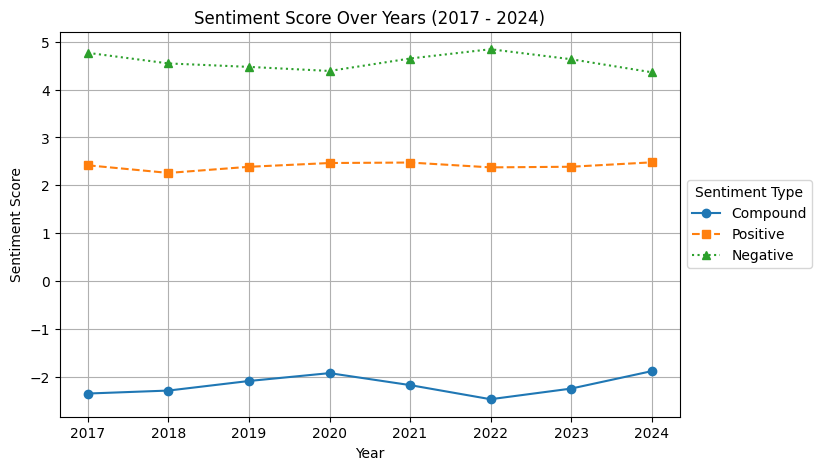

In [ ]:
# Creating the line plot.

plt.figure(figsize=(8, 5))

# Differentiating the three sentiment types by different styles.
plt.plot(years, compound, marker='o', label='Compound', linestyle='-')
plt.plot(years, positive, marker='s', label='Positive', linestyle='--')
plt.plot(years, negative, marker='^', label='Negative', linestyle=':')

# Adding labels and titles.
plt.xlabel("Year")
plt.ylabel("Sentiment Score")
plt.title("Sentiment Score Over Years (2017 - 2024)")
plt.legend(title="Sentiment Type", loc="center left", bbox_to_anchor=(1, 0.5))
plt.grid(True)

plt.show()

**INTERPRETATION OF GRAPH**:

First of all, the graph shows that overall negative sentiment has higher values than positive sentiment, meaning that no matter the year, news articles are more likely to have a higher percentage of negative connotations rather than positive.

Furthermore, the patterns on the graph indicate, that possibly negative sentiment has a sinusoidal like pattern. Meaning that, mean negative sentiment possibly reaches its lowest values during election years, which then increases during the following years up to a midway point, and then decreases culminating in an another locally, lowest value in the next election year.

Regarding postive sentiment however, it seems to have a pattern that is closer to a horizontal line, meaning that across all years mean positive sentiment stayed relatively similiar.

Possibly then, it is mostly the negative mean sentiment value which shapes the compound sentiment value, resulting in the latter's similar sinusoidal pattern, where compound sentiment reaches its peak (is less negative) during election years compared to non-election years.   

Interestingly then, the graph shows that, possibly sentiment differed for election years compared to non-election years in both election cycles, but not in the way that was expected, i.e. that negative sentiment would be higher for election years.

Furthermore, thanks to this yearly graph, we can see that the last two election cycles had quite similar patterns of sentiment, which could possibly indicate that the impact of COVID-19 on the pattern of news sentiment may not be as substantial as it could seem.

However, in the next section which relies on statistical testing can we confidently say whether there were significant differences in sentiment. Caution is advised when familiarizing oneself with the conclusions from the visual interpretation of the graph, which served as something more of an initial exploration into the data.


## **Mean Article Sentiment Regarding Year Type (Election or Non-election)**

In [ ]:
# In order to compute the mean article sentiment regarding election vs non-election years,
# a 'year type' key is added to the american_articles object, which indicates whether
# the article is from an election or non-election year.

us_election_years = (2020, 2024)

election_articles = []
non_election_articles = []

for article in american_articles:
    article['year'] = int(article['year'])
    if article['year'] in us_election_years:
          article['year type'] = 'election'
          election_articles.append(article)
    else:
          article['year type'] = 'non-election'
          non_election_articles.append(article)

In [ ]:
# Next the mean sentiment regarding year type is calculated,
# in a similiar manner to the yearly mean sentiment calculation,
# so the method won't be discussed.

year_type_total = defaultdict(lambda: {"total_compound": 0,
  "total_positive" : 0,
  "total_negative" : 0,
  "count" :0})

for article in american_articles:
    year_type = article['year type']

    sentiment = article['sentiment']
    compound = sentiment['compound']
    positive = sentiment['positive']
    negative = sentiment['negative']

    year_type_total[year_type]['total_compound'] += compound
    year_type_total[year_type]['total_positive'] += positive
    year_type_total[year_type]['total_negative'] += negative
    year_type_total[year_type]["count"] += 1

year_type_sentiment = []

for key, value in year_type_total.items():
    mean_compound = value["total_compound"] / value["count"]
    mean_positive = value["total_positive"] / value["count"]
    mean_negative = value["total_negative"] / value["count"]
    year_type = key
    year_type_sentiment.append({
        "year type": year_type,
        "mean sentiment": {
            "compound" : round(mean_compound, 3),
            "positive" : round(mean_positive, 3),
            "negative" : round(mean_negative, 3)
            }
    })

year_type_sentiment = sorted(year_type_sentiment, key=lambda x: x['year type'])
year_type_sentiment

[{'year type': 'election',
  'mean sentiment': {'compound': -1.902,
   'positive': 2.473,
   'negative': 4.376}},
 {'year type': 'non-election',
  'mean sentiment': {'compound': -2.268,
   'positive': 2.384,
   'negative': 4.652}}]

## **Comparison of Mean Sentiment Between Articles from Election years and Non-election Years**

In order to compare the mean of three types of sentiment for articles stemming from elections years and articles from non-election years, three t-tests were conducted. The code is shown below, along with the results of the tests.

In [ ]:
# Conducting the t-test for mean compound sentiment with the use of ttest_ind() function.

# Creating a list of all compound sentiment values for election and non-election years respectively.
el_compound_scores = [article["sentiment"]["compound"] for article in american_articles if article["year type"] == "election"]
nonel_compound_scores = [article["sentiment"]["compound"] for article in american_articles if article["year type"] == "non-election"]

# Conducting the t-test.
result = ttest_ind(el_compound_scores, nonel_compound_scores, equal_var = False)

# Calculating the mean and standard deviation for both groups that will be used in describing the results.
# election years
m_el = np.mean(el_compound_scores)
sd_el = np.std(el_compound_scores)

# non-election years
m_nonel = np.mean(nonel_compound_scores)
sd_nonel = np.std(nonel_compound_scores)

print(f"T-test results:\n t-statistic = {result.statistic:.4f},\n p-value = {result.pvalue:.4f},\n df = {result.df:.4f},\n mean for election year = {m_el:.4f},\n standard deviation for election year = {sd_el:.4f},\n mean for non-election year = {m_nonel:.4f},\n standard deviation for non-election years = {sd_nonel:.4f}")


T-test results:
 t-statistic = 4.0532,
 p-value = 0.0001,
 df = 3686.9248,
 mean for election year = -1.9023,
 standard deviation for election year = 3.4211,
 mean for non-election year = -2.2683,
 standard deviation for non-election years = 3.7130


Results show that mean compound sentiment was higher for articles stemming from election years (*M* = -1.90, *SD* = 3.42) compared to articles from non-election years (*M* = -2.68, *SD* = 3.71), *t*(3687) = 4.05, *p* < .0001.

In [ ]:
# Conducting the t-test for mean positive sentiment with the use of ttest_ind() function.

# Creating a list of all positive sentiment values for election and non-election years respectively.
el_positive_scores = [article["sentiment"]["positive"] for article in american_articles if article["year type"] == "election"]
nonel_positive_scores = [article["sentiment"]["positive"] for article in american_articles if article["year type"] == "non-election"]

# Conducting the t-test.
result = ttest_ind(el_positive_scores, nonel_positive_scores, equal_var = False)

# Calculating the mean and standard deviation for both groups that will be used in describing the results.
# election years
m_el = np.mean(el_positive_scores)
sd_el = np.std(el_positive_scores)

# non-election years
m_nonel = np.mean(nonel_positive_scores)
sd_nonel = np.std(nonel_positive_scores)

print(f"T-test results:\n t-statistic = {result.statistic:.4f},\n p-value = {result.pvalue:.4f},\n df = {result.df:.4f},\n mean for election year = {m_el:.4f},\n standard deviation for election year = {sd_el:.4f},\n mean for non-election year = {m_nonel:.4f},\n standard deviation for non-election years = {sd_nonel:.4f}")


T-test results:
 t-statistic = 2.2519,
 p-value = 0.0244,
 df = 3678.8548,
 mean for election year = 2.4732,
 standard deviation for election year = 1.5030,
 mean for non-election year = 2.3840,
 standard deviation for non-election years = 1.6274


Results show that mean positive sentiment was higher for articles stemming from election years (*M* = 2.47, *SD* = 1.50) compared to articles from non-election years (*M* = 2.38, *SD* = 1.63), *t*(3679) = 2.25, *p* = .0244.

In [ ]:
# Conducting the t-test for mean negative sentiment with the use of ttest_ind() function.

# Creating a list of all negative sentiment values for election and non-election years respectively.
el_negative_scores = [article["sentiment"]["negative"] for article in american_articles if article["year type"] == "election"]
nonel_negative_scores = [article["sentiment"]["negative"] for article in american_articles if article["year type"] == "non-election"]

# Conducting the t-test and extracting the t-statisic and p-value.
result = ttest_ind(el_negative_scores, nonel_negative_scores, equal_var = False)

# Calculating the mean and standard deviation for both groups that will be used in describing the results.
# election years
m_el = np.mean(el_negative_scores)
sd_el = np.std(el_negative_scores)

# non-election years
m_nonel = np.mean(nonel_negative_scores)
sd_nonel = np.std(nonel_negative_scores)

print(f"T-test results:\n t-statistic = {result.statistic:.4f},\n p-value = {result.pvalue:.4f},\n df = {result.df:.4f},\n mean for election year = {m_el:.4f},\n standard deviation for election year = {sd_el:.4f},\n mean for non-election year = {m_nonel:.4f},\n standard deviation for non-election years = {sd_nonel:.4f}")


T-test results:
 t-statistic = -3.9567,
 p-value = 0.0001,
 df = 3692.2826,
 mean for election year = 4.3755,
 standard deviation for election year = 2.6486,
 mean for non-election year = 4.6522,
 standard deviation for non-election years = 2.8791


Results show that mean negative sentiment was lower for articles stemming from election years (*M* = 4.38, *SD* = 2.65) compared to articles from non-election years (*M* = 4.65, *SD* = 2.88), *t*(3692) = -3.96, *p* < .0001.

### **Visualizing the results**

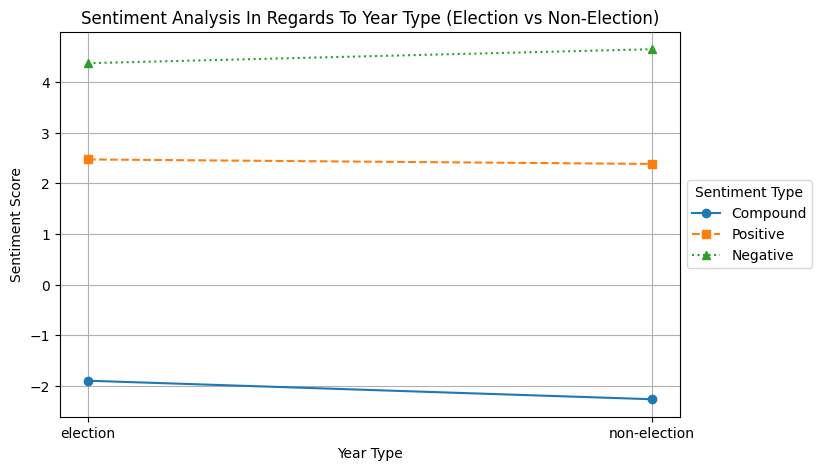

In [ ]:
year_types = [item['year type'] for item in year_type_sentiment]

# The mean value of all types of sentiment.
compound = [item['mean sentiment']['compound'] for item in year_type_sentiment]
positive = [item['mean sentiment']['positive'] for item in year_type_sentiment]
negative = [item['mean sentiment']['negative'] for item in year_type_sentiment]

# Creating the line plot.
plt.figure(figsize=(8, 5))
plt.plot(year_types, compound, marker='o', label='Compound', linestyle='-')
plt.plot(year_types, positive, marker='s', label='Positive', linestyle='--')
plt.plot(year_types, negative, marker='^', label='Negative', linestyle=':')

# Differentiating the three sentiment types by different styles.
plt.xlabel("Year Type")
plt.ylabel("Sentiment Score")
plt.title("Sentiment Score In Regards To Year Type (Election vs Non-Election)")
plt.legend(title="Sentiment Type", loc="center left", bbox_to_anchor=(1, 0.5))
plt.grid(True)

plt.show()

## **Topic Modeling Using Article Titles - Comparison Between Election and Non-election Articles' Topics**


In [ ]:
# Creating a list of articles for both election and non-election years,
# that consist of only articles that have an existing scraped title string value for the title key.

election_filtered = [article for article in election_articles if article['title'] is not None]
non_election_filtered = [article for article in non_election_articles if article['title'] is not None]

In [ ]:
# Checking the amount of disregarded articles, due to lack of scraped title.

len(election_filtered) # 1907 out of 2000
len(non_election_filtered) # 5621 out of 6000

# These proportions can be deemed as not too substantial, due to the large size of the total amount of articles
# per each type of year. As such, the topic modeling can be carried out.

1907

In [ ]:
# Creating jsonl files for election vs non-election articles to be used in topic modelling.

with open("election filtered.jsonl", "w", encoding = "utf-8") as file:
    for line in election_filtered:
        file.write(json.dumps(line, ensure_ascii = False) + "\n")

with open("non-election filtered.jsonl", "w", encoding = "utf-8") as file:
    for line in non_election_filtered:
        file.write(json.dumps(line, ensure_ascii = False) + "\n")


In [ ]:
# Sourcing the code from the N7 notebook necessary to conduct analysis using an LDA model.
# The only change was that the first created function in the MyCorpus class,
# extracts the 'title' key instead of 'content', as the specific key
# held the values which were the subject of interest for topic modeling.

class MyCorpus:
    """
    A class that represents a corpus and has useful methods defined.

    """

    def __init__(self, path, key="title"):
        """
        Reads from a JSON line file. Tokenizes and lemmatizes
        the text under key. It writes out the new JSON line
        file with a new field -- tokens.
        Args:
            path (str): a path to a JSON line.
            key (str): a key with the content to lemmatize.
        """
        self._path_original = path
        self._key = key
        self._dictionary = None
        self._path = path.replace(".", "_NLP.")
        with open(self._path, "w") as file:
            n = 1
            for line in open(self._path_original, "r"):
                temp_dict = json.loads(line)
                text_nlp = nlp(temp_dict[self._key])
                temp_dict["tokens"] = []
                for token in text_nlp:
                    is_stop = (
                        token.is_stop
                        or token.is_punct
                        or token.is_space
                        or token.is_bracket
                        or token.is_currency
                        or token.is_digit
                        or token.is_quote
                        or len(token) < 2
                    )
                    if is_stop:
                        continue
                    else:
                        temp_dict["tokens"].append(token.lemma_.lower())
                file.write(json.dumps(temp_dict) + "\n")
                sys.stdout.write(f"\rLine {n} processed")
                n += 1
                sys.stdout.flush()

    def set_dictionary(self, dictionary):
        """
        Assigns a gensim.corpora.dictionary.Dictionary object
        to self._dictionary.

        Args:
            dictionary (gensim.corpora.dictionary.Dictionary): a dictionary
            that stores the frequencies of unique tokens in the corpus.
        """
        self._dictionary = dictionary

    def get_tokens(self):
        """
        It takes the path to a JSON line file with comments from Reddit and
        returns a generator that yields tokens for each comment.

        Yields:
            list : list of tokens for a comment from Reddit.
        """
        for doc in open(self._path, "r"):
            temp = json.loads(doc)
            yield temp["tokens"]

    def get_bow(self):
        """
        It takes a dictionary with frequencies of unique tokens in the corpus
        and for each list of tokens returns a list of tuples that denote the
        id of a given token and its frequency in a given document.

        Raises:
            ValueError: if the dictionary was not assigned to self._dictionary.

        Yields:
            list : a list of tuples that denote the id of a given token and its
            frequency in a given document.
        """
        if self._dictionary:
            for doc in self.get_tokens():
                yield self._dictionary.doc2bow(doc)
        else:
            raise ValueError("Dictionary has the value of None")

    def __iter__(self):
        """
        Yields:
            list : a list of tuples that denote the id of a given token and
            its frequency in a given document.
        """
        for doc in self.get_bow():
            yield doc

    def get_topics(self, model):
        """
        It takes a model and returns a generator that yields a mapping for each
        comment from Reddit. Among other keys it returns the most probable topic
        based on the LDA model provided and its probability.

        Args:
            model (gensim.models.ldamodel.LdaModel): Latent Dirchlet Allocation
            model.

        Yields:
            dict : a mapping for each comment from Reddit. Among other keys it
            returns the most prpobable topic based on the LDA model provided and
            its probability.
        """
        for doc in open(self._path, "r"):
            temp = json.loads(doc)
            topics = model.get_document_topics(self._dictionary.doc2bow(temp["tokens"]))
            topic, prob = sorted(topics, key=lambda x: x[1], reverse=True)[0]
            temp["topic"] = topic + 1
            temp["topic_prob"] = prob
            yield temp


class MyModel(LdaModel):
    """
    Subclass of gensim.models.LdaModel.
    """

    def get_coherence(self, corpus):
        """
        Returns the average coherence measure for the given model.

        Args:
            corpus (MyCorpus): A corpus on which the model is computed.

        Returns:
            float: the average coherence measure for the given model.
        """
        top_topics = self.top_topics(corpus)
        return sum([t[1] for t in top_topics]) / len(top_topics)

    def get_top_tokens(self, corpus):
        """
        Returns a list of dictionaries that depict the most probable
        tokens for each topic.

        Args:
            corpus (MyCorpus): A corpus on which the model was computed.

        Returns:
            list: list of dicitionaries that depict the most probable
            tokens fro each topic.
        """
        top_tokens = self.top_topics(corpus)
        return [{key: value for value, key in t[0]} for t in top_tokens]


def run_lda_models(corpus, dictionary, min_topics, max_topics, step=1, **kwargs):
    """
    Computes a sequence of lda models for a given corpus and dictionary. It prints
    the coherence measure and number of topics to the screen. It writes out the
    model to disk.

    Args:
        corpus (MyModel): A stream of document vectors or sparse matrix of shape (num_documents, num_terms).
        dictionary (dict): a mapping that assigns id to unique tokens from the corpus.
        min_topics (int): the smallest number of topics to compute.
        max_topics (int): the highest number of topics to compute.
        step (int, optional): the size of the break inbetween computed models. Defaults to 1.
    """
    name = input("Please provide the name of the model\n")
    _ = dictionary[0]
    id2word = dictionary.id2token
    if not os.path.exists("models"):
        os.mkdir("models")
    if not os.path.exists("png"):
        os.mkdir("png")
    for num_topic in range(min_topics, max_topics + 1, step):
        model = MyModel(
            corpus=corpus,
            id2word=id2word,
            alpha="asymmetric",
            eta="auto",
            iterations=500,
            passes=20,
            eval_every=None,
            num_topics=num_topic,
            random_state=1044,
            per_word_topics=True,
        )
        temp_dict = {}
        temp_dict["name"] = name
        temp_dict["num_topics"] = num_topic
        temp_dict["coherence"] = model.get_coherence(corpus=corpus)
        path_name = os.path.join("models", name + "-" + str(num_topic))
        model.save(path_name)
        print(temp_dict)

### **LDA Model for Election Articles**

In [ ]:
# Creating the corpus.

corpus_el = MyCorpus(path = "election filtered.jsonl")

Line 1907 processed

In [ ]:
# Creating the dictionary and then filtering it for extremes.

dictionary_el = Dictionary(corpus_el.get_tokens())

dictionary_el.filter_extremes(no_below=5, no_above=0.5)

In [ ]:
corpus_el.set_dictionary(dictionary_el)

run_lda_models(corpus=corpus_el, dictionary=dictionary_el, min_topics = 5, max_topics = 10)

Please provide the name of the model
Non-election model


{'name': 'Non-election model', 'num_topics': 5, 'coherence': -12.55360867306481}


{'name': 'Non-election model', 'num_topics': 6, 'coherence': -13.25184225080349}


{'name': 'Non-election model', 'num_topics': 7, 'coherence': -14.218155494888592}


{'name': 'Non-election model', 'num_topics': 8, 'coherence': -14.433194441743785}


{'name': 'Non-election model', 'num_topics': 9, 'coherence': -14.226301013977942}
{'name': 'Non-election model', 'num_topics': 10, 'coherence': -14.70129381115406}


In [ ]:
model_name = input("Provide the name of the model you would like to load:\n")
model_path = os.path.join("models", model_name)
model = LdaModel.load(model_path)

Provide the name of the model you would like to load:
Non-election model-10


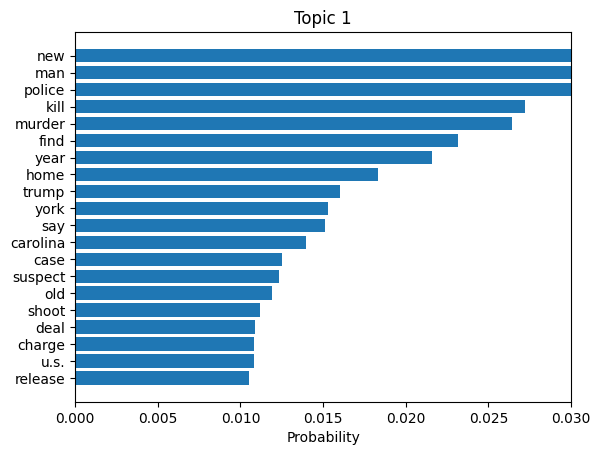

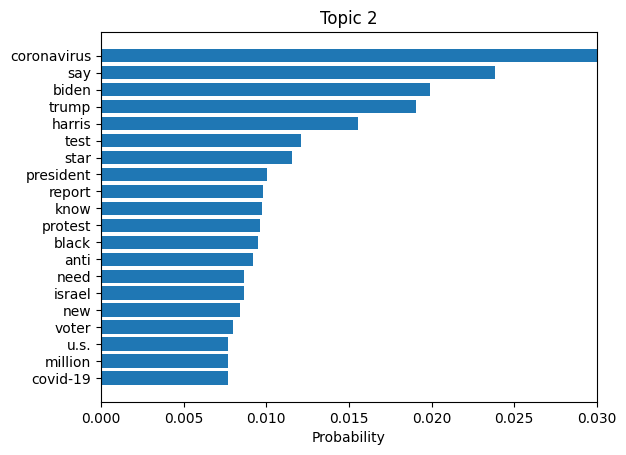

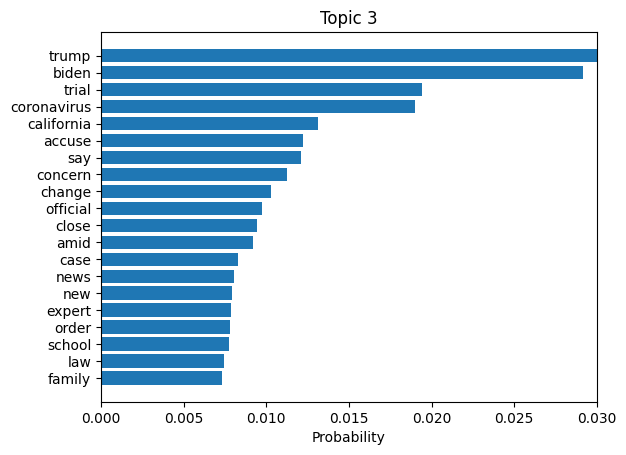

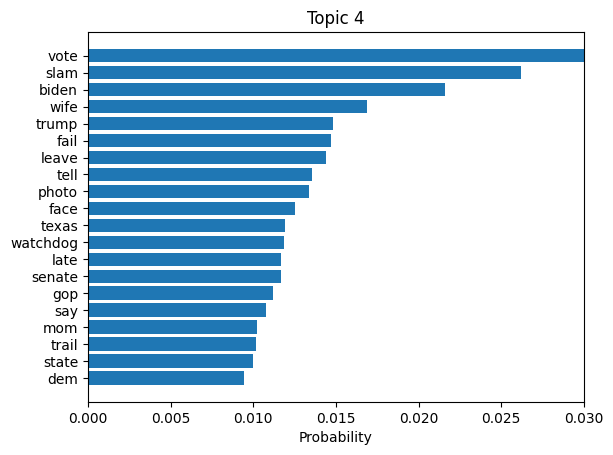

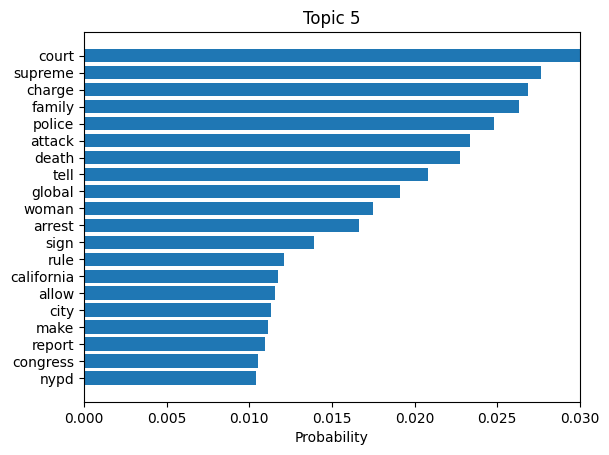

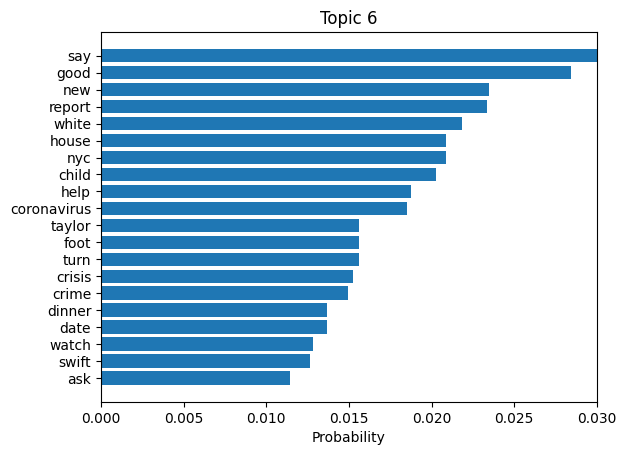

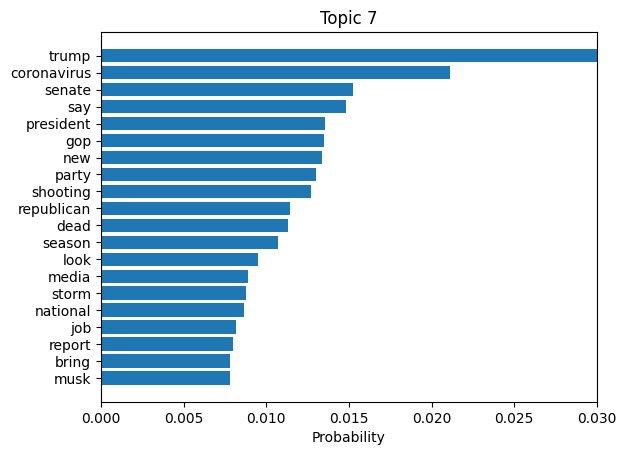

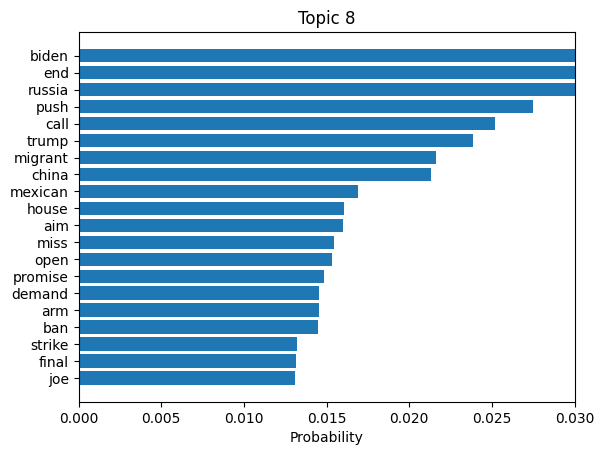

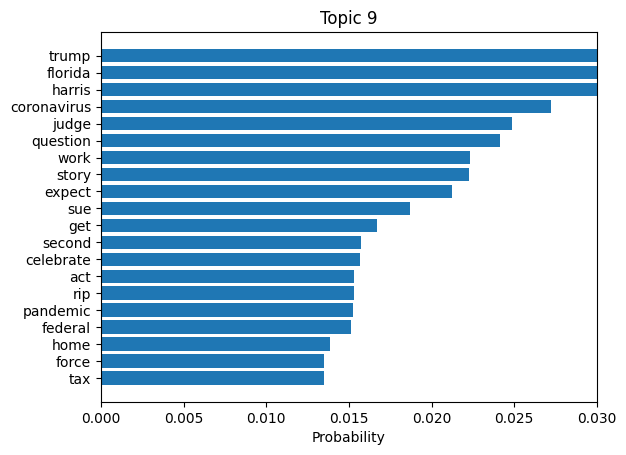

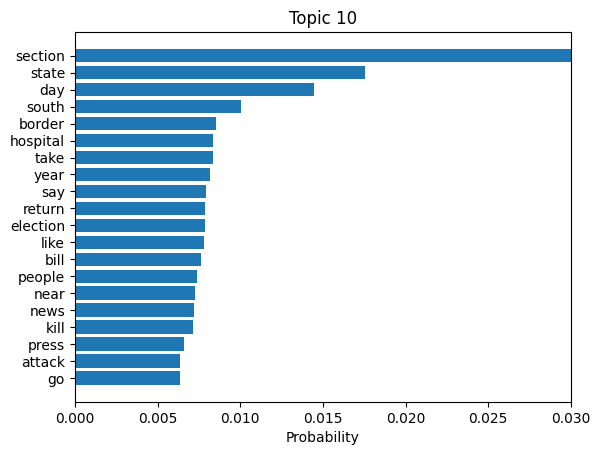

In [ ]:
list_top_tokens = model.get_top_tokens(corpus_el)
for i in range(len(list_top_tokens)):
    plt.barh(
        list(list_top_tokens[i].keys()),
        list(list_top_tokens[i].values()),
        align="center",
    )
    plt.xlim(0, 0.03)
    plt.gca().invert_yaxis()
    plt.title("Topic" + " " + str(i + 1))
    plt.xlabel("Probability")
    plt.savefig("png/" + "topic" + str(i + 1))
    plt.show()

**INTERPRETATION**

For the article titles from the election years, from the 5 models, we have chosen the solution proposing 10 topics as it had the lowest coherence measure (-14.70). Below, we present the names that we propose for the distinguished topics, that we have chosen based on the probability of words. We also provide short descriptions for each topic.

Topic 1 – Homicide Cases – This topic covers homicide-related issues in the U.S., including police-involved killings, murder cases, and efforts to capture, charge, and prosecute offenders. It may relate to broader discussions on crime and justice, the role of law enforcement and legal proceedings.

Topic  2 – Main Political Issues – This topic focuses on key events that significantly influenced current affairs at the given time. It relates to the biggest issues, that were quite largely covered in the media, e.g. the coronavirus pandemic, presidential election or Black Lives Matter protests.

Topic  3 – Legal Cases and Court Proceedings – This topic focuses on legal and judicial matters, particularly cases where individuals face accusations that may lead to prolonged public trials. It covers law and order issues that, while serious, are generally less severe than homicide cases.

Topic  4 – Elections – This topic covers discussions surrounding elections, including potential candidates and political parties, key issues, and predictions about the possible outcomes.

Topic  5 – Court Decisions on Criminal Cases – This topic focuses specifically on the law verdicts regarding criminals.

Topic  6 – Memes on Political Situation – This topic likely captures discourse where humor and sarcasm were used to express political opinions and comment on current affairs. Probable words for this topic, such as “good,” “white,” “house,” and “Taylor Swift,” may reflect public dissatisfaction with presidential candidates and the satirical suggestion of “Taylor Swift for President.”

Topic  7 – Public Safety and Gun Violence – This topic appears to capture discussions around public safety, gun violence, and the role of the Republican Party, particularly during Donald Trump's presidency. The presence of words related to shootings, coronavirus and policies suggests a debate over political responsibility and public concern.

Topic  8 – US Foreign and Immigration Policies – This topic appears to capture discussions regarding US foreign relations and immigration policies. Key themes include diplomatic tensions with Russia and China, border security and migration issues involving Mexico, and policy actions such as bans, arms deals, and negotiations.

Topic  9 – Coronavirus Pandemic – This topic covers the issues related to the global pandemic – its course, impact and consequences for the United States.

Topic  10 – US Southern Border – This topic seems to capture discussions on immigration and security at the US southern border. It includes references to policy decisions, media coverage and impact on humans’ lives (hospital, people, attack, kill), suggesting debates around border enforcement, migrant conditions, and legislative actions.

### **LDA Model for Non-election Articles**

In [ ]:
corpus_nonel = MyCorpus(path = "non-election filtered.jsonl")

Line 5621 processed

In [ ]:
dictionary_nonel = Dictionary(corpus_nonel.get_tokens())

dictionary_nonel.filter_extremes(no_below=5, no_above=0.5)

In [ ]:
corpus_nonel.set_dictionary(dictionary_nonel)

run_lda_models(corpus=corpus_nonel, dictionary = dictionary_nonel, min_topics = 5, max_topics = 10)

Please provide the name of the model
Non-election model


{'name': 'Non-election model', 'num_topics': 5, 'coherence': -10.830839651843771}


{'name': 'Non-election model', 'num_topics': 6, 'coherence': -9.823359009190023}


{'name': 'Non-election model', 'num_topics': 7, 'coherence': -11.527684075938803}


{'name': 'Non-election model', 'num_topics': 8, 'coherence': -11.292799458628988}


{'name': 'Non-election model', 'num_topics': 9, 'coherence': -11.902243456295643}
{'name': 'Non-election model', 'num_topics': 10, 'coherence': -11.820198283128157}


In [ ]:
model_name = input("Provide the name of the model you would like to load:\n")
model_path = os.path.join("models", model_name)
model = LdaModel.load(model_path)

Provide the name of the model you would like to load:
Non-election model-9


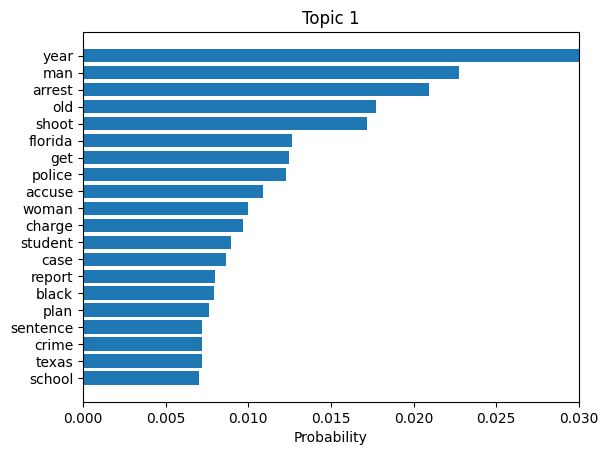

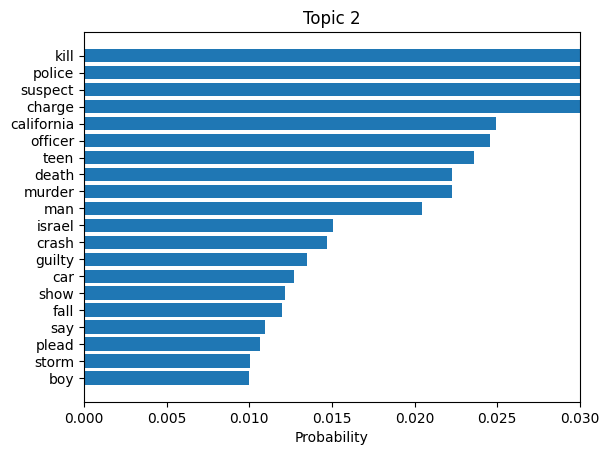

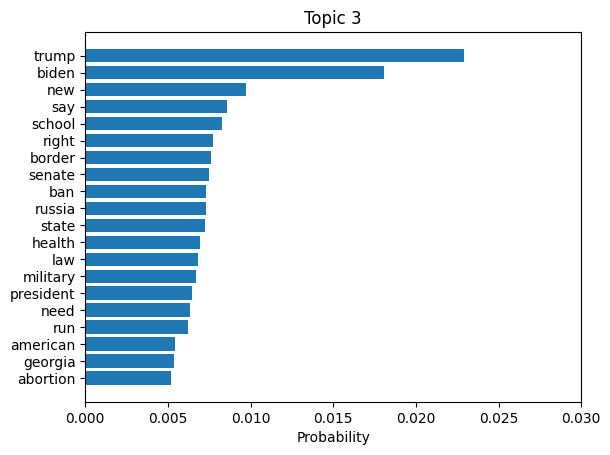

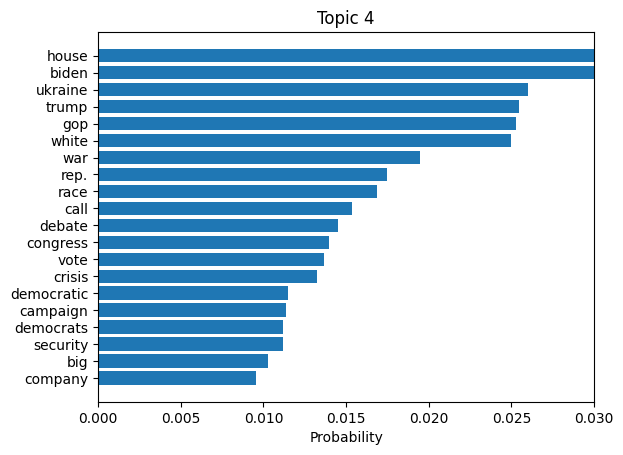

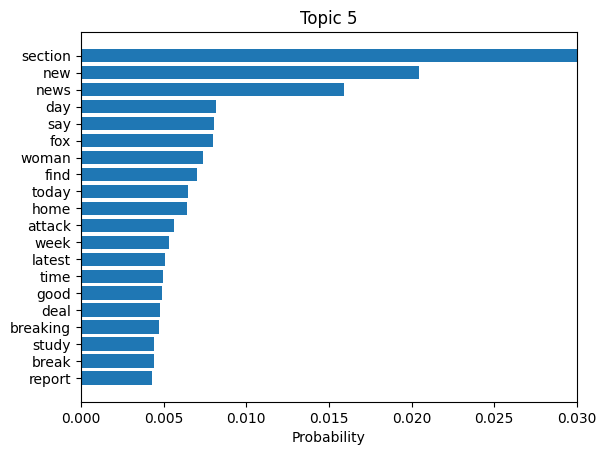

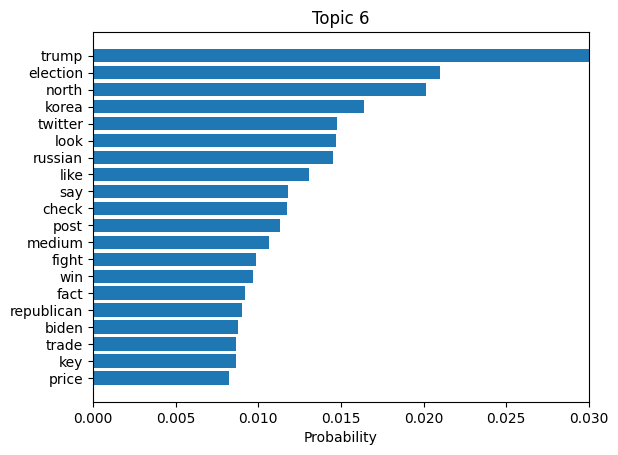

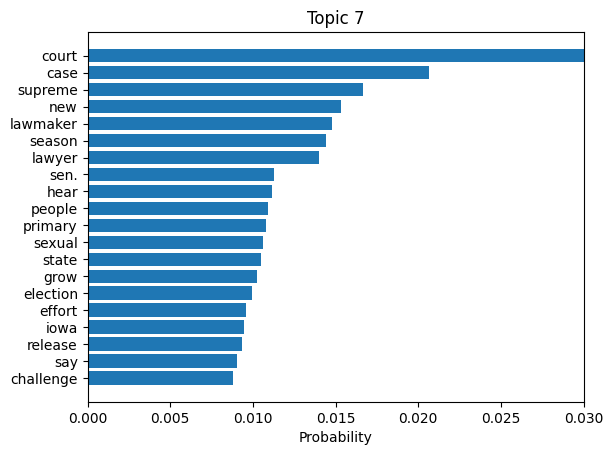

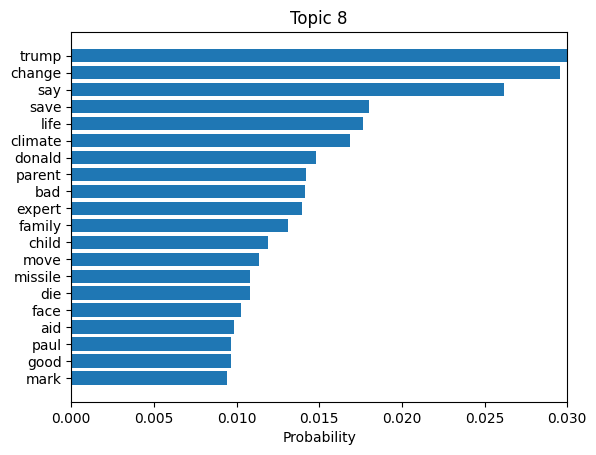

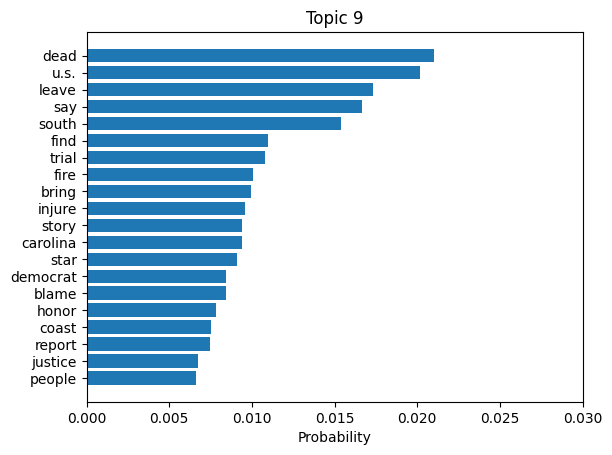

In [ ]:
list_top_tokens = model.get_top_tokens(corpus_nonel)
for i in range(len(list_top_tokens)):
    plt.barh(
        list(list_top_tokens[i].keys()),
        list(list_top_tokens[i].values()),
        align="center",
    )
    plt.xlim(0, 0.03)
    plt.gca().invert_yaxis()
    plt.title("Topic" + " " + str(i + 1))
    plt.xlabel("Probability")
    plt.savefig("png/" + "topic" + str(i + 1))
    plt.show()

**INTERPRETATION**

For the article titles from the non-election years, from 5 models, we have decided on the solution proposing 9 topics as it had the lowest coherence measure (-11.90). Similarly, we provide names for the distinguished topics with their short descriptions.

Topic 1 – Shootings – This topic appears to focus on a specific form of committed crime, i.e. shootings. It can possibly refer to incidents that do not result in death.

Topic  2 – Accidental Killings – This topic can possibly capture the discussion around accident related deaths (e.g. cars accidents, extreme weather events) as well as killings that were claimed to be accidental (use of words like police, officer, murder, guilty).

Topic  3 – Key Political Topics in Social Discourse – This topic captures discussions on major political issues in the US, as reflected in media and social discourse. It includes debates surrounding presidential elections, policy issues (abortion, military) and international affairs (Russia).

Topic  4 – US Elections and Policy Debates – This topic captures discussions surrounding US elections, particularly the roles of Democrats and Republicans in congressional and presidential races. It refers to the dynamic of the election campaigns and the debates on policy issues between the two parties, e.g. regarding the war on Ukraine.

Topic  5 – Headlines – This topic seems to capture all words common for news headlines (e.g. section, news, day, fox). Possibly the words occurred so commonly in the analyzed titles that they formed a separate topic, that is not interpretable in terms of news coverage content.

Topic  6 – Foreign Influence and Misinformation in US Elections – This topic appears to focus on foreign influence and misinformation in US elections. It seems to refer to the alleged election interferences from foreign countries and social media’s role in the process.

Topic  7 – Legal Challenges and Court Decisions on Election Processes – This topic focuses on legal and legislative discussions surrounding election processes in the US. It includes court cases and Supreme Court rulings, state-level legislative efforts and election-related legal disputes.

Topic  8 – Donald Trump Related Controversial News – This topic refers to the news regarding Donald Trump – his personal life, physical attributes and political views.

Topic  9 – Tragic Incidents and Public Safety Issues in the Southern U.S. – This title likely captures the aspect of tragic accidents and deaths that possibly result from public safety policies, mainly in Southern US. It touches on the aspect of political accountability for such incidents.

# **Discussion**

## **Research Questions 1 and 2**
Results of our study could be considered surprising. Although, we did find that three different types of sentiment, i.e. compound, positive and negative, differed between election and non-election years significantly, the observed pattern was opposite to what could have been expected.

We were interested to see, whether media published more negative content, i.e. articles with lower compound and positive, higher negative sentiment, during election period compared to non-election years, as this was a phenomenon broadly described by previous research, as was shown in our introduction.

What was actually observed in the current study, was that during election years news content could be considered more positive compared to non-election news content, i.e. having higher positive and compound, and lower negative sentiment.

This pattern may have been impacted by a possible bias, due to the limited number of sources from which articles were gathered (possibly even due to the attributes of the news outlets themselves). This occured in our study due to our, admittedly, not advanced knowledge of handling such large and diverse amounts of data. Future studies should then focus on diversifying the news sources from which articles and their sentiment values would be extracted

## **Research Question 3**

The analysis of the common topics emerging from news articles during the election and non-election with the LDA Model techniques gave insight into a bigger understanding of the key themes covered. Overall, the topics identified in both election and non-election years shared a strong similarity, primarily covering crime, legal proceedings, and policy discussions. This suggests that media discourse consistently revolves around similar issues, regardless of the election cycle.

Interestingly, the topic of elections seems to be even more frequently referenced during the non-election years. This could possibly indicate that the discourse regarding elections is constantly present. Although election-oriented topics were less apparent during the election years, simultaneously they formed a more clear cut category, possibly suggesting high salience of this theme. Moreover, the distinguished topic regarding use of humor and sarcasm during the election years could indicate stronger emotional patterns, which accompany the approaching elections.

We would like to emphasize that while this qualitative investigation and comparison of the distinguished topics provide insight into commonly covered themes, it remains exploratory in nature and has certain limitations. It is possible that the degree of similarity of the emerging topics between cycles would differ if more specificity was introduced to the analysis, i.e. if models for more topics were tested. We aimed, however, at primarily reducing the collected data to identify the key patterns and similarities across different election cycles.

# **References**
Alvarez, German & Choi, Jaewon & Strover, Sharon. (2020). Good News, Bad News: A Sentiment Analysis of the 2016 Election Russian Facebook Ads. *International Journal of Communication. 14*. 3027-3053.

Chaudhry, H. N., Javed, Y., Kulsoom, F., Mehmood, Z., Khan, Z. I., Shoaib, U., & Janjua, S. H. (2021). Sentiment Analysis of before and after Elections: Twitter Data of U.S. Election 2020. Electronics, 10(17), 2082. https://doi.org/10.3390/electronics10172082

McCombs, M. (2002). The agenda-setting role of the mass media in the shaping of public opinion. In Mass Media Economics 2002 Conference, London School of Economics

Patterson, T. E. (2016). News Coverage of the 2016 General Election: How the Press Failed the Voters. SSRN Electronic Journal. https://doi.org/10.2139/ssrn.2884837

Utych, S. M. (2018). Negative Affective Language in Politics. American Politics Research, 46(1), 77–102. https://doi.org/10.1177/1532673x17693830